## 2.Below table contains the bank details of customer – need to predict the how we can offer loan to customer based on the cybill score, Age, insurance, debit card , cards.

### Eg. Dataset

| Customer id | Cards | Debit card | Insurance | Age | Cibil Score | Loan offer |
|-------------|-------|------------|-----------|-----|--------------|------------|
|      5      |   0   |      1     |     0     |  50 |    34.94     |      0     |
|      3      |   1   |      0     |     0     |  18 |    0.891     |      1     |
|     66      |   0   |      1     |     0     |   5 |    0.33      |      1     |
|     70      |   0   |      1     |     1     |  31 |    0.037     |      0     |
|     96      |   0   |      1     |     0     |  30 |    0.038     |      1     |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
import plotly.express as px
import seaborn as sns

In [2]:
data = pd.read_excel("Data set.xlsx", sheet_name=1)
data.head()

,Cutomer id,Cards,Debit card,Insurance,Age,Cibil Score,Loan offer
0,5,0.0,1.0,0.0,50.0,34.940,0
1,3,1.0,0.0,0.0,18.0,0.891,1
2,66,0.0,1.0,0.0,5.0,0.330,1
3,70,0.0,1.0,1.0,31.0,0.037,0
4,96,0.0,1.0,0.0,30.0,0.038,1


In [28]:
data.shape

(1340, 7)

In [29]:
data.dtypes

Cutomer id       int64
Cards          float64
Debit card     float64
Insurance      float64
Age            float64
Cibil Score    float64
Loan offer       int64
dtype: object

### Checking the null values

In [30]:
data.isnull().sum()

Cutomer id       0
Cards           12
Debit card      41
Insurance       48
Age            189
Cibil Score      0
Loan offer       0
dtype: int64

In [31]:
(data.isnull().sum() / len(data)) * 100

Cutomer id      0.000000
Cards           0.895522
Debit card      3.059701
Insurance       3.582090
Age            14.104478
Cibil Score     0.000000
Loan offer      0.000000
dtype: float64

### Null value Imputing

In [3]:
data['Cards'] = data['Cards'].fillna(0)

In [4]:
data['Debit card'] = data['Debit card'].fillna(data['Debit card'].mode()[0])

In [5]:
data['Insurance'] = data['Insurance'].fillna(data['Insurance'].mode()[0])

In [6]:
data['Age'] = data['Age'].fillna(data['Age'].median())

### Again Checking Null Value

In [7]:
data.isnull().sum()

Cutomer id     0
Cards          0
Debit card     0
Insurance      0
Age            0
Cibil Score    0
Loan offer     0
dtype: int64

### Null value became zero and treated, so we can proceed further

### Customer Id is not needed so I am not taking Customer Id

In [8]:
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

In [9]:
X.head()

,Cards,Debit card,Insurance,Age,Cibil Score
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038


In [185]:
y.head()

0    0
1    1
2    1
3    0
4    1
Name: Loan offer, dtype: int64

### Splitting the Dataset

In [10]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(Xtrain), len(Xtest), len(ytrain), len(ytest))

1072 268 1072 268


### We are going to train the models with different models

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay

### Logistic Regression

In [12]:
lc = LogisticRegression()
lc.fit(Xtrain, ytrain)

LogisticRegression()

In [13]:
y_pred = lc.predict(Xtest)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1], dtype=int64)

In [14]:
accuracy_score(ytest, y_pred)

0.7425373134328358

In [248]:
lc_auc = roc_auc_score(ytest, y_pred)
lc_auc

0.7395089285714286

In [16]:
cm = confusion_matrix(ytest, y_pred)
cm

array([[ 86,  42],
       [ 27, 113]], dtype=int64)

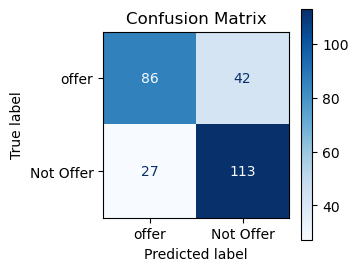

In [17]:
cm_display = ConfusionMatrixDisplay(cm, display_labels=['offer', 'Not Offer'])
fig, ax = plt.subplots(figsize=(3, 3))
cm_display.plot(cmap='Blues', values_format='.0f', ax=ax)
plt.title('Confusion Matrix')
plt.show()

In [18]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71       128
           1       0.73      0.81      0.77       140

    accuracy                           0.74       268
   macro avg       0.75      0.74      0.74       268
weighted avg       0.74      0.74      0.74       268



### Checking the model with our prediction

### 1. Cards 1, Debit Card 1, Insurance 1, Age 20, Cibil Score 0.3

In [192]:
lc.predict([[1, 1, 1, 20, 0.3]])

array([1], dtype=int64)

### 2. Cards 0, Debit Card 1, Insurance 1, Age 35, Cibil Score 0.04

In [228]:
lc.predict([[0, 1, 1, 35, 0.04]])

array([0], dtype=int64)

### Support Vector Machine (SVC classifier)

In [19]:
svm = SVC(kernel='rbf', probability=True).fit(Xtrain, ytrain)

In [20]:
y_pred = svm.predict(Xtest)

In [21]:
y_pred

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1], dtype=int64)

In [252]:
accuracy_score(ytest, y_pred)

0.6940298507462687

In [254]:
svm_auc = roc_auc_score(ytest, y_pred)
svm_auc

0.6880580357142856

In [22]:
cm = confusion_matrix(ytest, y_pred)
cm

array([[ 71,  57],
       [ 25, 115]], dtype=int64)

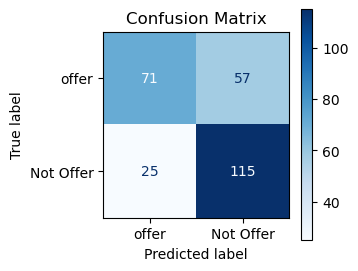

In [23]:
cm_display = ConfusionMatrixDisplay(cm, display_labels=['offer', 'Not Offer'])
fig, ax = plt.subplots(figsize=(3, 3))
cm_display.plot(cmap='Blues', values_format='.0f', ax=ax)
plt.title('Confusion Matrix')
plt.show()

In [24]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.55      0.63       128
           1       0.67      0.82      0.74       140

    accuracy                           0.69       268
   macro avg       0.70      0.69      0.69       268
weighted avg       0.70      0.69      0.69       268



### Checking the model with our prediction

### 1. Cards 1, Debit Card 1, Insurance 1, Age 20, Cibil Score 0.3

In [242]:
svm.predict([[1, 1, 1, 20, 0.3]])

array([1], dtype=int64)

### 2. Cards 0, Debit Card 1, Insurance 1, Age 35, Cibil Score 0.04

In [243]:
svm.predict([[0, 1, 1, 35, 0.04]])

array([1], dtype=int64)

### KNearest Neighbor Classifier

In [25]:
knn =KNeighborsClassifier(n_neighbors=10)

In [26]:
knn.fit(Xtrain, ytrain)

KNeighborsClassifier(n_neighbors=10)

In [257]:
y_pred = knn.predict(Xtest)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1], dtype=int64)

In [258]:
accuracy_score(ytest, y_pred)

0.6865671641791045

In [259]:
knn_auc = roc_auc_score(ytest, y_pred)
knn_auc

0.6879464285714285

In [27]:
cm = confusion_matrix(ytest, y_pred)
cm

array([[ 71,  57],
       [ 25, 115]], dtype=int64)

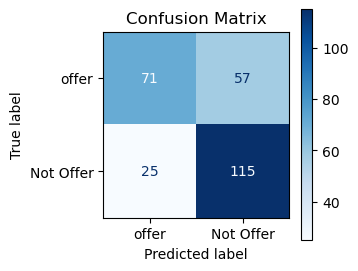

In [28]:
cm_display = ConfusionMatrixDisplay(cm, display_labels=['offer', 'Not Offer'])
fig, ax = plt.subplots(figsize=(3, 3))
cm_display.plot(cmap='Blues', values_format='.0f', ax=ax)
plt.title('Confusion Matrix')
plt.show()

In [29]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.55      0.63       128
           1       0.67      0.82      0.74       140

    accuracy                           0.69       268
   macro avg       0.70      0.69      0.69       268
weighted avg       0.70      0.69      0.69       268



### Checking the model with our prediction

### 1. Cards 1, Debit Card 1, Insurance 1, Age 20, Cibil Score 0.3

In [226]:
knn.predict([[0, 1, 1, 35, 0.3]])

array([1], dtype=int64)

### 2. Cards 0, Debit Card 1, Insurance 1, Age 35, Cibil Score 0.04

In [230]:
knn.predict([[0, 1, 1, 35, 0.04]])

array([1], dtype=int64)

### Roc Curves

In [244]:
lc_fpr, lc_tpr, lc_threshold = roc_curve(ytest, lc.predict_proba(Xtest)[:,1])
svm_fpr, svm_tpr, svm_threshold = roc_curve(ytest, svm.predict_proba(Xtest)[:,1])
knn_fpr, knn_tpr, knn_threshold = roc_curve(ytest, knn.predict_proba(Xtest)[:,1])

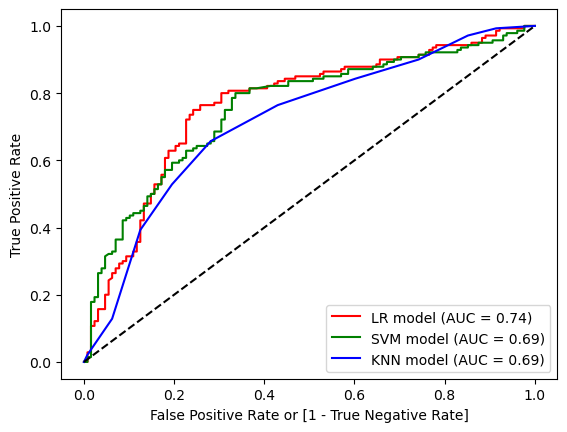

In [261]:
plt.plot(lc_fpr, lc_tpr, color='red', label=f'LR model (AUC = {lc_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, color='green', label=f'SVM model (AUC = {svm_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, color='blue', label=f'KNN model (AUC = {knn_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

## Conclusion

## We have performed 3 Classifier Models
### 1. Logitic Regresson Model with 74.25% Accuracy and 0.74 auc
### 2. Support Vector Machine (SVC) with 68.80% Accuracy and 0.69 auc
### 3. KNearest Neighbor Classifier with 68.79% Accuracy and 0.69 auc

### Out of these 3, only ***Logistic Regression*** Performed good so we are choosing Logistic Regression.